In [1]:
import os
from PIL import Image
import torch

from diffusion.controlnet import ControlNetModel
from diffusion.pipeline_controlnet import StableDiffusionControlNetPipeline
from diffusers import UniPCMultistepScheduler
from diffusers.utils import load_image

device = "cuda:7"

/beegfs/home/anning/.conda/envs/cs492d/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Set model paths

In [2]:
base_model_path = "stable-diffusion-v1-5/stable-diffusion-v1-5"      # NOTE: set as the base Stable Diffusion model
controlnet_path = "./runs/controlnet_fill50k"           # NOTE: set as the output directory of your ControlNet training

### Load models and scheduler

In [3]:
# Load ControlNet
controlnet = ControlNetModel.from_pretrained(
    controlnet_path, 
    torch_dtype=torch.float16
)
# Load Stable Diffusion with ControlNet
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, 
    controlnet=controlnet, 
    torch_dtype=torch.float16,
    safety_checker=None,
)
# Set scheduler
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Load model to GPU
pipe.to(device)

Loading pipeline components...:  50%|█████     | 3/6 [00:00<00:00,  5.01it/s]/beegfs/home/anning/.conda/envs/cs492d/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  6.31it/s]
You have disabled the safety checker for <class 'diffusion.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circums

StableDiffusionControlNetPipeline {
  "_class_name": "StableDiffusionControlNetPipeline",
  "_diffusers_version": "0.28.0",
  "_name_or_path": "stable-diffusion-v1-5/stable-diffusion-v1-5",
  "controlnet": [
    "diffusion.controlnet",
    "ControlNetModel"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "UniPCMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

### Load condition for ControlNet

Prompt: pale golden rod circle with old lace background


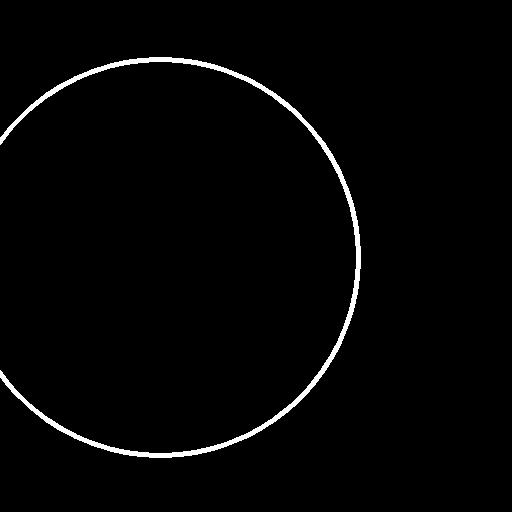

In [4]:
control_image = load_image("./data/conditioning_image_1.png")
prompt = "pale golden rod circle with old lace background"

print(f"Prompt: {prompt}")
control_image

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:02<00:00,  9.06it/s]


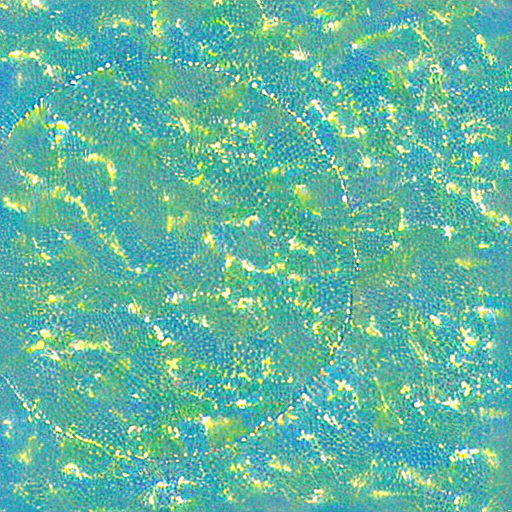

In [5]:
seed = 10
generator = torch.manual_seed(seed)

# Generate image
image = pipe(
    prompt, 
    num_inference_steps=20, 
    generator=generator, 
    image=control_image
).images[0]

image
# image.save("./output.png")

In [9]:
import json

prompts = json.load(open("/beegfs/home/anning/allen/Diffusion-Assignment3-ControlNet-LoRA/task_1_controlnet/data/test_prompts.json"))
for i in range(5):
    prompt = prompts[str(i)]
    if i < 2:
        ext = "png"
    else:
        ext = "jpg"
    control_image = load_image(f"/beegfs/home/anning/allen/Diffusion-Assignment3-ControlNet-LoRA/task_1_controlnet/data/test_conditions/{i}.{ext}")
    seed = 42
    generator = torch.manual_seed(seed)
    image = pipe(
        prompt, 
        num_inference_steps=20, 
        generator=generator, 
        image=control_image
    ).images[0]
    image.save(f"./output/output_{i}.png")


 10%|█         | 2/20 [00:00<00:01, 12.69it/s]

100%|██████████| 20/20 [00:01<00:00, 13.98it/s]


ValueError: Incorrect path or URL. URLs must start with `http://` or `https://`, and /beegfs/home/anning/allen/Diffusion-Assignment3-ControlNet-LoRA/task_1_controlnet/data/test_conditions/2.png is not a valid path.